# Time Series Prediction of Stock Trading Volume
---
**Name: Sneha Ekka**



## 1 - Import Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
all_data = pd.read_csv('/content/assign2data.csv')

## 2 - Examin the Data

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ObsNum          753 non-null    int64  
 1   TrainTest       753 non-null    object 
 2   DayOfWeek       753 non-null    object 
 3   Month           753 non-null    int64  
 4   VolStock1(t)    503 non-null    float64
 5   EADay           753 non-null    int64  
 6   EADayBefore     753 non-null    int64  
 7   EADayAfter      753 non-null    int64  
 8   VolStock1(t-1)  504 non-null    float64
 9   VolStock2(t-1)  753 non-null    float64
 10  VolStock3(t-1)  753 non-null    float64
 11  VolStock4(t-1)  753 non-null    float64
 12  VolStock5(t-1)  753 non-null    float64
 13  VolStock6(t-1)  753 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 82.5+ KB


In [ ]:
print("No. of rows and columns in the data:", all_data.shape)
print("First 5 rows of the data:")
all_data.head()

No. of rows and columns in the data: (753, 14)
First 5 rows of the data:


,ObsNum,TrainTest,DayOfWeek,Month,VolStock1(t),EADay,EADayBefore,EADayAfter,VolStock1(t-1),VolStock2(t-1),VolStock3(t-1),VolStock4(t-1),VolStock5(t-1),VolStock6(t-1)
0,1,Train,Monday,3,2.65,0,0,0,2.55,4.01,3.89,2.77,6.30,5.01
1,2,Train,Tuesday,3,3.99,0,0,0,2.65,2.18,2.74,1.81,4.29,3.02
2,3,Train,Wednesday,3,3.08,0,0,0,3.99,5.00,4.68,4.47,6.82,4.99
3,4,Train,Thursday,3,2.55,0,0,0,3.08,4.51,3.22,2.89,4.82,3.99
4,5,Train,Friday,3,2.56,0,0,0,2.55,3.80,2.60,3.40,4.62,4.01


In [ ]:
# Changing datatypes for categoical variables
all_data['EADay'] = all_data['EADay'].astype('category')
all_data['EADayBefore'] = all_data['EADayBefore'].astype('category')
all_data['EADayAfter'] = all_data['EADayAfter'].astype('category')

In [ ]:
train_data = all_data[:252] # dataset to train
validate_data = all_data[252:503] # dataset for validation
test_data = all_data[503:753]

## 3 - Visualize the data

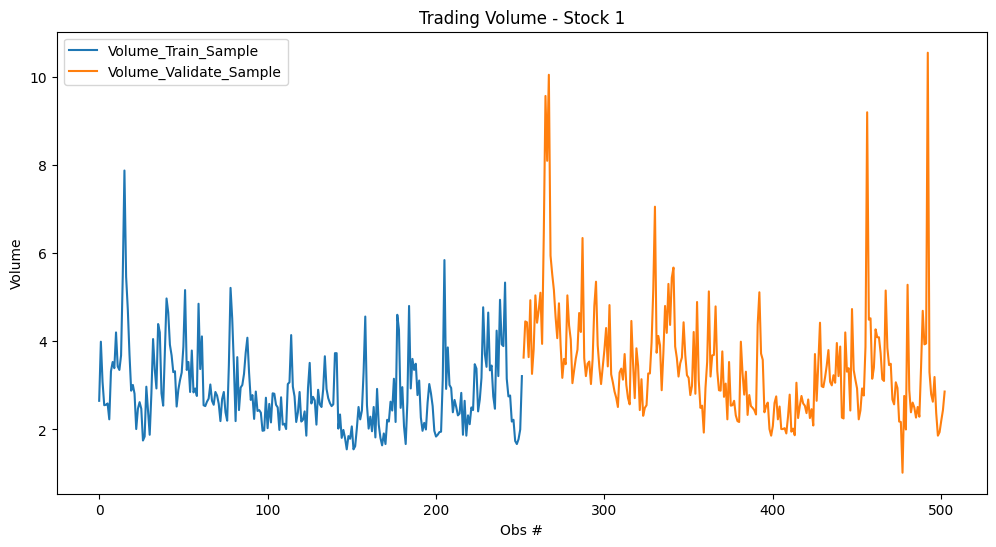

In [ ]:
# Trading Volume of Stock 1 for Train and Validate Test Sets
plt.figure(figsize=(12, 6))
plt.plot(train_data['VolStock1(t)'], label='Volume_Train_Sample')
plt.plot(validate_data['VolStock1(t)'], label='Volume_Validate_Sample')
plt.xlabel('Obs #')
plt.ylabel('Volume')
plt.legend()
plt.title('Trading Volume - Stock 1')
plt.show()

## 4 - OLS Models
---
In this analysis, we aimed to predict 'VolStock1(t)' using features like 'DayOfWeek', 'Month', 'EADay', 'EADayBefore', 'EADayAfter', and lagged volume data of other stocks. Initially, a baseline model was developed using all features, followed by iterative refinement to minimize Mean Squared Error (MSE) on validation datasets. Through experimentation, we sought to construct an Ordinary Least Squares (OLS) model for accurate prediction of 'VolStock1(t)'. Continuous refinement remains essential for enhancing predictive performance.

### Model 1
An OLS regression was conducted using the following features: 'EADay', 'EADayBefore', 'EADayAfter', 'VolStock2(t-1)', 'VolStock3(t-1)', 'VolStock4(t-1)', 'VolStock5(t-1)', and 'VolStock6(t-1)' to predict the target variable 'VolStock1(t)'. The resulting Mean Squared Error (MSE) of the model was found to be 1.27. This suggests that the model's predictions deviate from the actual values by an average squared error of 1.27 units. Further analysis and refinement may be necessary to improve predictive accuracy.

In [ ]:
X = train_data[['EADay','EADayBefore','EADayAfter',
                'VolStock2(t-1)','VolStock3(t-1)','VolStock4(t-1)','VolStock5(t-1)','VolStock6(t-1)']]
y = train_data['VolStock1(t)']

X = sm.add_constant(X)
ols1 = sm.OLS(y, X).fit()

print_model = ols1.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     22.05
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           3.80e-25
Time:                        03:54:07   Log-Likelihood:                -261.59
No. Observations:                 252   AIC:                             541.2
Df Residuals:                     243   BIC:                             572.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4339      0.172      8.

In [ ]:
Xnew = validate_data[['EADay','EADayBefore','EADayAfter',
                      'VolStock2(t-1)','VolStock3(t-1)','VolStock4(t-1)','VolStock5(t-1)','VolStock6(t-1)']]

Xnew = sm.add_constant(Xnew)

vol_pred = ols1.predict(Xnew)
vol_validate = validate_data['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.27


### Model 2
An OLS regression model utilizing only categorical variables for the day before, the day of, and the day after an earnings announcement yielded a Mean Squared Error (MSE) of 1.68 when predicting 'VolStock1(t)'. Compared to the previous model incorporating additional features such as lagged volume data of multiple stocks, this simplified approach exhibited slightly lower predictive accuracy. Further analysis is needed to understand the implications of this difference and explore potential avenues for improvement.

In [ ]:
X = train_data[['EADay','EADayBefore', 'EADayAfter']]
y = train_data['VolStock1(t)']

X = sm.add_constant(X)
ols2 = sm.OLS(y, X).fit()

print_model = ols2.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     19.92
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           1.33e-11
Time:                        03:54:07   Log-Likelihood:                -303.16
No. Observations:                 252   AIC:                             614.3
Df Residuals:                     248   BIC:                             628.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.8128      0.052     53.648      

In [ ]:
Xnew = validate_data[['EADay','EADayBefore', 'EADayAfter']]

Xnew = sm.add_constant(Xnew)

vol_pred = ols2.predict(Xnew)
vol_validate = validate_data['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.68


### Model 3

Incorporating lagged trading volume from five other stocks (Stock2 - Stock6) that are in the same industry as Stock1 yielded an OLS regression model with an MSE of 1.54 when predicting trading volume. While it shows slight improvement over using categorical variables alone, it still trails behind the initial model with a broader feature set.

In [ ]:
X = train_data[['VolStock2(t-1)','VolStock3(t-1)','VolStock4(t-1)','VolStock5(t-1)','VolStock6(t-1)']]
y = train_data['VolStock1(t)']

X = sm.add_constant(X)
ols4 = sm.OLS(y, X).fit()

print_model = ols4.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     16.14
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           9.33e-14
Time:                        03:54:07   Log-Likelihood:                -294.62
No. Observations:                 252   AIC:                             601.2
Df Residuals:                     246   BIC:                             622.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4340      0.194      7.

In [ ]:
Xnew = validate_data[['VolStock2(t-1)','VolStock3(t-1)','VolStock4(t-1)','VolStock5(t-1)','VolStock6(t-1)']]

Xnew = sm.add_constant(Xnew)

vol_pred = ols4.predict(Xnew)
vol_validate = validate_data['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.54


### Model 4

Utilizing the day of the week as a predictor for trading volume of Stock1 has led to the highest OLS MSE recorded so far, with a value of 2.01. This suggests that the day of the week alone is not as effective an indicator compared to the previously tested categorical attributes or the lagged values of competitor stocks.

In [ ]:
# Perform one-hot encoding
dow_encoded = pd.get_dummies(train_data, columns=['DayOfWeek'], prefix='Day')
dow_encoded.head()

,ObsNum,TrainTest,Month,VolStock1(t),EADay,EADayBefore,EADayAfter,VolStock1(t-1),VolStock2(t-1),VolStock3(t-1),VolStock4(t-1),VolStock5(t-1),VolStock6(t-1),Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,1,Train,3,2.65,0,0,0,2.55,4.01,3.89,2.77,6.30,5.01,0,1,0,0,0
1,2,Train,3,3.99,0,0,0,2.65,2.18,2.74,1.81,4.29,3.02,0,0,0,1,0
2,3,Train,3,3.08,0,0,0,3.99,5.00,4.68,4.47,6.82,4.99,0,0,0,0,1
3,4,Train,3,2.55,0,0,0,3.08,4.51,3.22,2.89,4.82,3.99,0,0,1,0,0
4,5,Train,3,2.56,0,0,0,2.55,3.80,2.60,3.40,4.62,4.01,1,0,0,0,0


In [ ]:
X = dow_encoded[['Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]
y = dow_encoded['VolStock1(t)']

X = sm.add_constant(X)
ols5 = sm.OLS(y, X).fit()

print_model = ols5.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           VolStock1(t)   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.4102
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.801
Time:                        03:54:07   Log-Likelihood:                -329.53
No. Observations:                 252   AIC:                             669.1
Df Residuals:                     247   BIC:                             686.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4086      0.047     50.737

In [ ]:
# Perform one-hot encoding
dow_encoded_v = pd.get_dummies(validate_data, columns=['DayOfWeek'], prefix='Day')
dow_encoded_v.head()

,ObsNum,TrainTest,Month,VolStock1(t),EADay,EADayBefore,EADayAfter,VolStock1(t-1),VolStock2(t-1),VolStock3(t-1),VolStock4(t-1),VolStock5(t-1),VolStock6(t-1),Day_Friday,Day_Monday,Day_Thursday,Day_Tuesday,Day_Wednesday
252,253,Train/Validate,3,3.63,0,0,0,3.21,3.07,2.68,2.67,4.61,3.61,0,1,0,0,0
253,254,Train/Validate,3,4.45,0,0,0,3.63,3.04,3.82,2.93,4.36,3.99,0,0,0,1,0
254,255,Train/Validate,3,4.43,0,0,0,4.45,5.86,3.61,3.77,4.16,3.63,0,0,0,0,1
255,256,Train/Validate,3,3.64,0,0,0,4.43,4.00,4.97,5.12,4.26,2.93,0,0,1,0,0
256,257,Train/Validate,3,4.93,0,0,0,3.64,3.20,2.93,2.70,3.86,2.62,1,0,0,0,0


In [ ]:
Xnew = dow_encoded_v[['Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]

Xnew = sm.add_constant(Xnew)

vol_pred = ols5.predict(Xnew)
vol_validate = dow_encoded_v['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2.01


## 5 - Autoregressive (AR) Models
---
Using lagged value(s) of trading volume of competitor stocks to help predict current trading volume (known as an autoregressive model AR(n)). We have used Stock2 to predict trading volumne of Stock1.

* VolStock1(t) = a + b1 x VolStockCompetitor(t-n) + e

In [ ]:
train_data_new = train_data.copy()
validate_data_new = validate_data.copy()

# Define the lag values
lags = 5

# Create lagged variables
for lag in range(2, lags + 1):
    train_data_new[f'VolStock2(t-{lag})'] = train_data_new['VolStock2(t-1)'].shift(lag)

for lag in range(2, lags + 1):
    validate_data_new[f'VolStock2(t-{lag})'] = validate_data_new['VolStock2(t-1)'].shift(lag)

# Drop rows with NaN values due to shifting
train_data_new.dropna(inplace=True)
validate_data_new.dropna(inplace=True)

### Model 2: Lag (p) = 2

In [ ]:
X = train_data_new['VolStock2(t-2)']
y = train_data_new['VolStock1(t)']

X = sm.add_constant(X)

ar2 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_new['VolStock2(t-2)']

Xnew = sm.add_constant(Xnew)

vol_pred = ar2.predict(Xnew)
vol_validate = validate_data_new['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.91


### Model 3: Lag (p) = 3

In [ ]:
X = train_data_new['VolStock2(t-3)']
y = train_data_new['VolStock1(t)']

X = sm.add_constant(X)

ar2 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_new['VolStock2(t-3)']

Xnew = sm.add_constant(Xnew)

vol_pred = ar2.predict(Xnew)
vol_validate = validate_data_new['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.96


### Model 4: Lag (p) = 4

In [ ]:
X = train_data_new['VolStock2(t-4)']
y = train_data_new['VolStock1(t)']

X = sm.add_constant(X)

ar2 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_new['VolStock2(t-4)']

Xnew = sm.add_constant(Xnew)

vol_pred = ar2.predict(Xnew)
vol_validate = validate_data_new['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.97


### Model 5: Lag (p) = 5

In [ ]:
X = train_data_new['VolStock2(t-5)']
y = train_data_new['VolStock1(t)']

X = sm.add_constant(X)

ar2 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_new['VolStock2(t-5)']

Xnew = sm.add_constant(Xnew)

vol_pred = ar2.predict(Xnew)
vol_validate = validate_data_new['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 2.02


**Note:**

Exploring Autoregressive Models for Stock2 and employing OLS models for lagged values 2, 3, 4, and 5 resulted in the following Mean Squared Errors (MSEs): 1.91, 1.96, 1.97, and 2.02, respectively. These relatively high MSE values indicate that utilizing lagged values of Stock2 does not significantly improve the accuracy of predicting Stock1 values.

## 6 - Moving Averages (MA) Models

In this analysis, we explored the effectiveness of incorporating moving averages (MA) of lagged values of competitor stock's trading volume to predict the trading volume of Stock1. Four distinct models were developed:

- **Simple Moving Averages (SMA):** Utilizing the SMA of competitor stocks Stock2 to Stock6 alongside other features.
- **Average of SMAs:** Employing the average of the SMA values of competitor stocks Stock2 to Stock6 alongside other features.
- **Exponential Moving Averages (EMA):** Using the EMA of competitor stocks Stock2 to Stock6 alongside other features.
- **Average of EMAs:** Utilizing the average of the EMA values of competitor stocks Stock2 to Stock6 alongside other features.

Among these models, the fourth, incorporating the average of Exponential Moving Averages (EMAs) of competitor stocks, achieved the best result with an MSE of 1.08. This suggests that leveraging EMAs alongside feature engineering provides a more accurate prediction of Stock1's trading volume compared to other approaches tested.

In [ ]:
train_data_ma = train_data.copy()

# Define the window size for the moving averages
window_size = 4

# Competitor stocks
column_names = ['VolStock2(t-1)', 'VolStock3(t-1)', 'VolStock4(t-1)', 'VolStock5(t-1)', 'VolStock6(t-1)']

# Create moving averages for each column
for i, col in enumerate(column_names, start=2):
    # Calculate Simple Moving Average (SMA)
    train_data_ma[f'SMA_{i}'] = train_data_ma[col].rolling(window=window_size).mean()

    # Calculate Exponential Moving Average (EMA)
    train_data_ma[f'EMA_{i}'] = train_data_ma[col].ewm(span=window_size, adjust=False).mean()

# Drop rows with NaN values due to shifting
train_data_ma.dropna(inplace=True)

In [ ]:
validate_data_ma = validate_data.copy()

# Define the window size for the moving averages
window_size = 4

# Define the list of column names
column_names = ['VolStock2(t-1)', 'VolStock3(t-1)', 'VolStock4(t-1)', 'VolStock5(t-1)', 'VolStock6(t-1)']

# Create a copy of validate_data
validate_data_ma = validate_data.copy()

# Create moving averages for each column
for i, col in enumerate(column_names, start=2):
    # Calculate Simple Moving Average (SMA)
    validate_data_ma[f'SMA_{i}'] = validate_data_ma[col].rolling(window=window_size).mean()

    # Calculate Exponential Moving Average (EMA)
    validate_data_ma[f'EMA_{i}'] = validate_data_ma[col].ewm(span=window_size, adjust=False).mean()

# Drop rows with NaN values due to shifting
validate_data_ma.dropna(inplace=True)

In [ ]:
# Computing the average of SMAs and EMAs of competitor stocks
train_data_ma['SMA_avg'] = train_data_ma[['SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_6']].mean(axis=1)
train_data_ma['EMA_avg'] = train_data_ma[['EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']].mean(axis=1)

# Computing the average of SMAs and EMAs of competitor stocks
validate_data_ma['SMA_avg'] = validate_data_ma[['SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_6']].mean(axis=1)
validate_data_ma['EMA_avg'] = validate_data_ma[['EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']].mean(axis=1)

In [ ]:
# One-hot-encoding the 'DayOfWeek' column
train_data_ma = pd.get_dummies(train_data_ma, columns=['DayOfWeek'], prefix='Day')
validate_data_ma = pd.get_dummies(validate_data_ma, columns=['DayOfWeek'], prefix='Day')

In [ ]:
# One-hot-encoding the 'DayOfWeek' column
train_data_ma = pd.get_dummies(train_data_ma, columns=['Month'], prefix='m')
validate_data_ma = pd.get_dummies(validate_data_ma, columns=['Month'], prefix='m')

### Model 1: SMA Model
Simple Moving Average of Competitor Stocks

In [ ]:
X = train_data_ma[['SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_6',
                   'EADay','EADayBefore','EADayAfter',
                   'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                   'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]
y = train_data_ma['VolStock1(t)']

X = sm.add_constant(X)

ma1 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_ma[['SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_6',
                         'EADay','EADayBefore','EADayAfter',
                         'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                         'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]

Xnew = sm.add_constant(Xnew)

vol_pred = ma1.predict(Xnew)
vol_validate = validate_data_ma['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.28


### Model 2: Average of SMA
Average of SMA of Competitor Stocks

In [ ]:
X = train_data_ma[['SMA_avg','EADay','EADayBefore','EADayAfter',
                   'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                   'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]
y = train_data_ma['VolStock1(t)']

X = sm.add_constant(X)

ma2 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_ma[['SMA_avg','EADay','EADayBefore','EADayAfter',
                         'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                         'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]

Xnew = sm.add_constant(Xnew)

vol_pred = ma2.predict(Xnew)
vol_validate = validate_data_ma['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.12


### Model 3: EMA Model
Exponential Moving Average of Competitor Stocks

In [ ]:
X = train_data_ma[['EMA_2','EMA_3','EMA_4','EMA_5','EMA_6',
                   'EADay','EADayBefore','EADayAfter',
                   'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                   'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]
y = train_data_ma['VolStock1(t)']

X = sm.add_constant(X)

ma3 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_ma[['EMA_2','EMA_3','EMA_4','EMA_5','EMA_6',
                         'EADay','EADayBefore','EADayAfter',
                         'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                         'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]

Xnew = sm.add_constant(Xnew)

vol_pred = ma3.predict(Xnew)
vol_validate = validate_data_ma['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.18


### Model 4: Average of EMA
Average of EMA of Competitor Stocks

In [ ]:
X = train_data_ma[['EMA_avg','EADay','EADayBefore','EADayAfter',
                   'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                   'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]
y = train_data_ma['VolStock1(t)']

X = sm.add_constant(X)

ma4 = sm.OLS(y, X).fit()

In [ ]:
Xnew = validate_data_ma[['EMA_avg','EADay','EADayBefore','EADayAfter',
                         'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                         'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]

Xnew = sm.add_constant(Xnew)

vol_pred = ma4.predict(Xnew)
vol_validate = validate_data_ma['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)

print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1.08


## 7 - ARIMA Model

An Autoregressive Integrated Moving Average (ARIMA) model was implemented with the following parameters:

- AR order (p): 1
- Differencing order (d): 0
- MA order (q): 1

The ARIMA model was fitted to the training data, resulting in a Mean Squared Error (MSE) of approximately 2.01. This performance suggests that the ARIMA model may not be ideal for accurately predicting the trading volume of Stock1.

### 7.1 - Check for Stationarity

In [ ]:
# Check for stationarity and difference the series

from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller (ADF) Test
adf_result = adfuller(train_data['VolStock1(t)'])
print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Test Statistic: -6.658930741059792
p-value: 4.902975859395492e-09
Critical Values: {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}


**Note:** The series is stationary and hence no differencing required. Hence, d=0.

### 7.2 - Choose Optimal Parameters

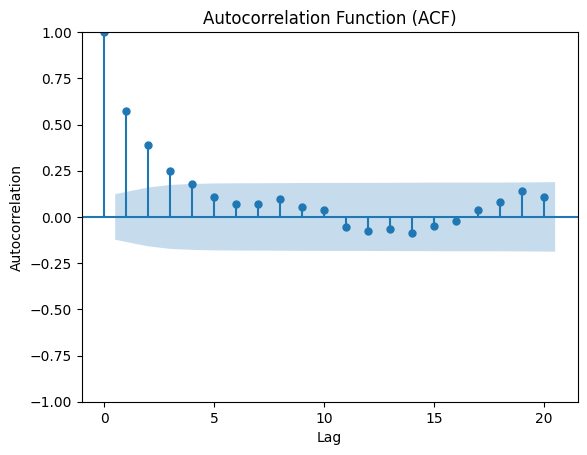

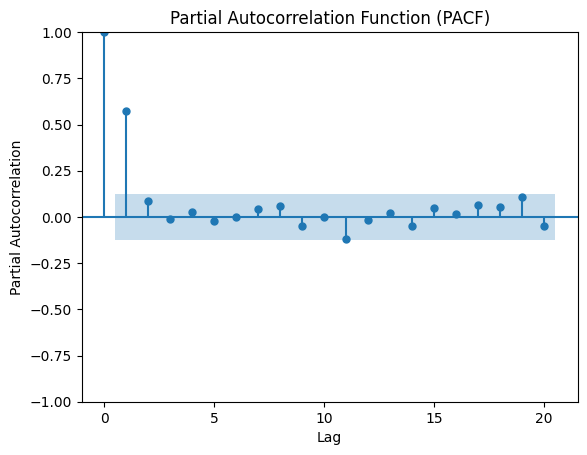

In [ ]:
# Plot ACF
plot_acf(train_data['VolStock1(t)'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(train_data['VolStock1(t)'], lags=20)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

- ACF Plot: Decays gradually/remains high for many lags
- PACF Plot: Cuts off/becomes close to zero

**Note:** This indicates it is an AR(p) process with p=2 or p=3.

### 7.3 - Fit the ARIMA Model

In [ ]:
# Define the order of the ARIMA model (p, d, q)
p = 1  # AR order
d = 0  # Differencing order
q = 1  # MA order

# Fit the ARIMA model
arima_model = ARIMA(train_data['VolStock1(t)'], order=(p, d, q))
arima_model_fitted = arima_model.fit()
print(arima_model_fitted.summary())

                               SARIMAX Results                                
Dep. Variable:           VolStock1(t)   No. Observations:                  252
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -279.061
Date:                Tue, 26 Mar 2024   AIC                            566.121
Time:                        03:54:10   BIC                            580.239
Sample:                             0   HQIC                           571.802
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8911      0.154     18.714      0.000       2.588       3.194
ar.L1          0.6675      0.089      7.484      0.000       0.493       0.842
ma.L1         -0.1420      0.110     -1.293      0.1

### 7.4 - Predict using ARIMA Model

In [ ]:
# Predicting on the validation set

vol_pred = arima_model_fitted.forecast(steps=len(validate_data))
vol_validate = validate_data['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2.0106481831284873


## 8 - SARIMAX Models

To enhance the predictive performance of the Autoregressive Integrated Moving Average (ARIMA) model, a Seasonal Autoregressive Integrated Moving Average with Exogenous Variables (SARIMAX) model was employed. The SARIMAX model was configured with the following parameters:

- AR order (p): 1
- Differencing order (d): 0
- MA order (q): 2
- Seasonal AR order (P): 1
- Seasonal differencing order (D): 0
- Seasonal MA order (Q): 2
- Seasonal period (s): 5

Additionally, lagged values of trading volume from Stock2 to Stock6 were incorporated as exogenous variables. Upon fitting the SARIMAX model to the training data, a Mean Squared Error (MSE) of 1.99 was obtained. This suggests that the inclusion of exogenous variables has led to a slight improvement in predictive accuracy compared to the ARIMA model alone.

### 8.1 - Check for Seasonality

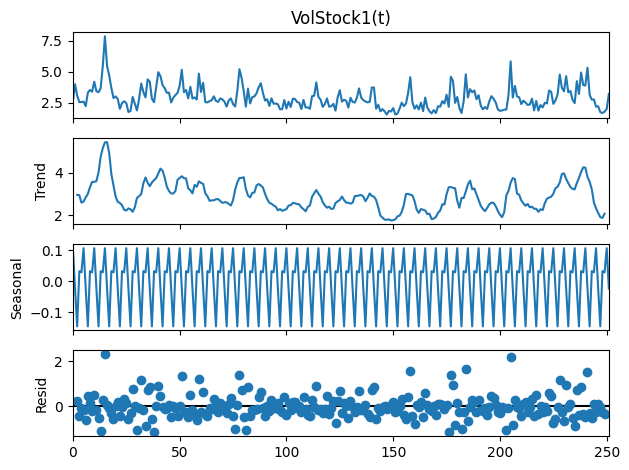

In [ ]:
# Decompose the time series
decomposition = seasonal_decompose(train_data['VolStock1(t)'], period=5)
decomposition.plot()
plt.show()

### 8.2 - Choose Optimal Parameters

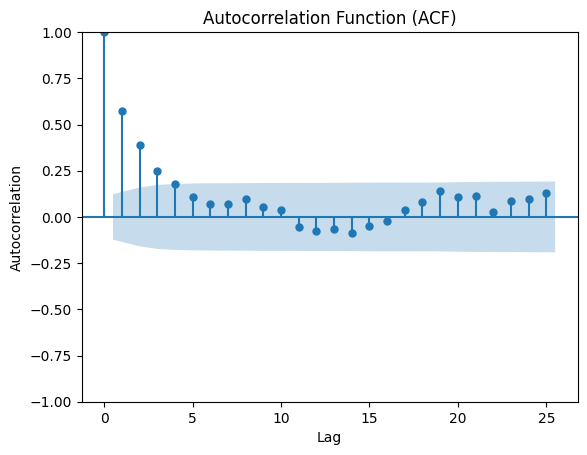

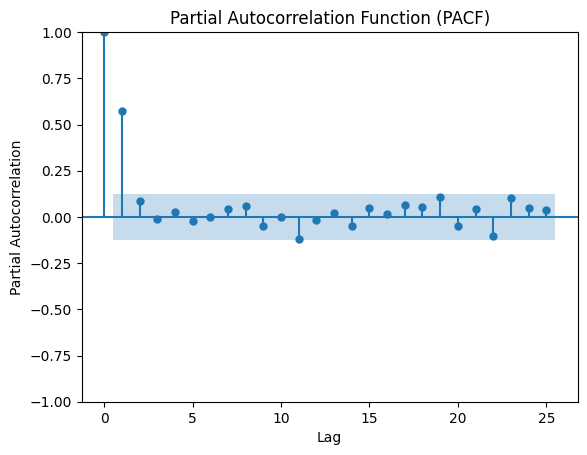

In [ ]:
# Plot ACF and PACF
plot_acf(train_data['VolStock1(t)'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(train_data['VolStock1(t)'])
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

### 8.3 - Fit the SARIMAX Model

In [ ]:
# Define the order of the ARIMA model (p, d, q)
p, d, q = 1, 0, 2
P, D, Q = 1, 0, 2
s = 5

In [ ]:
# Fit SARIMAX model with exogenous variables
exog_data = train_data[['VolStock2(t-1)','VolStock3(t-1)','VolStock4(t-1)','VolStock5(t-1)','VolStock6(t-1)']]

sarimax_model_1 = SARIMAX(train_data['VolStock1(t)'], exog=exog_data,
                          order=(p, d, q), seasonal_order=(P, D, Q, s))

sarimax_model_fitted_1 = sarimax_model_1.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 8.4 - Predict Using SARIMAX Model

In [ ]:
# Predicting on the validation set

vol_pred = sarimax_model_fitted_1.forecast(steps=len(validate_data),
                                           exog=validate_data[['VolStock2(t-1)','VolStock3(t-1)','VolStock4(t-1)','VolStock5(t-1)','VolStock6(t-1)']])
vol_validate = validate_data['VolStock1(t)']

mse = mean_squared_error(vol_validate, vol_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.9000086491531354


## 9 - Model Selection

### **Conclusion: Best Performing Model**

Among the various models tested, the approach utilizing the average of Exponential Moving Averages (EMAs) of competitor stocks has emerged as the most effective, exhibiting the lowest Mean Squared Error (MSE) of 1.08. This model's superior performance suggests its potential efficacy in predicting out-of-sample values for Stock1. The utilization of EMAs provides a weighted average of recent trading volume trends, allowing the model to capture both short-term fluctuations and long-term trends in the data. Moreover, incorporating competitor stock data enhances the model's predictive capabilities by leveraging information from related assets within the same industry, thereby offering insights into broader market dynamics. Overall, the combination of EMAs and competitor stock data offers a robust framework for predicting Stock1's trading volume, with the potential to generalize well to unseen data.

## 10 - Prediction Results for "test sample"

Using the Moving Averages model that incorporates the average of Exponential Moving Averages (EMAs) of competitor stocks to predict finally on the out-of-sample test data.

In [ ]:
test_data_ma = test_data.copy()

# Define the window size for the moving averages
window_size = 4

# Define the list of column names
column_names = ['VolStock2(t-1)', 'VolStock3(t-1)', 'VolStock4(t-1)', 'VolStock5(t-1)', 'VolStock6(t-1)']

# Create moving averages for each column
for i, col in enumerate(column_names, start=2):

    # Calculate Exponential Moving Average (EMA)
    test_data_ma[f'EMA_{i}'] = test_data_ma[col].ewm(span=window_size, adjust=False).mean()

In [ ]:
# Computing the average of EMAs of competitor stocks
test_data_ma['EMA_avg'] = test_data_ma[['EMA_2', 'EMA_3', 'EMA_4', 'EMA_5', 'EMA_6']].mean(axis=1)

# One-hot-encoding the 'DayOfWeek' column
test_data_ma = pd.get_dummies(test_data_ma, columns=['DayOfWeek'], prefix='Day')

# One-hot-encoding the 'Month' column
test_data_ma = pd.get_dummies(test_data_ma, columns=['Month'], prefix='m')

In [ ]:
# Predicting on the Test Set using the features that yielded best results in terms of MSE

Xnew = test_data_ma[['EMA_avg','EADay','EADayBefore','EADayAfter',
                     'm_3', 'm_4', 'm_5', 'm_6', 'm_7', 'm_8', 'm_9', 'm_10', 'm_11', 'm_12', 'm_13', 'm_14',
                     'Day_Monday','Day_Tuesday','Day_Wednesday','Day_Thursday','Day_Friday']]

Xnew = sm.add_constant(Xnew)

vol_pred_test = ma4.predict(Xnew)

In [ ]:
# Write predictions for TradingVol(t) out-of-sample "test sample" to CSV file
# IMPORTANT: Your predictions should be labelled with the index of observations 503-752
# You should name your file "Assignment2 - YOUR NAME.csv"

vol_pred_test.to_csv('Assignment2 - Sneha Ekka.csv', header=['VolStock1_test'], index=True)